# Temperature at Palo Alto

## Dependency

In [107]:
import eeweather
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from datetime import datetime, date
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('expand_frame_repr', False)
plt.style.use('default')

## Parameter

In [92]:
# Yuki's location
LAT = 37.41
LON = -122.12
# START = datetime(2021, 1, 1, tzinfo=pytz.UTC)
START = datetime(2012, 1, 1, tzinfo=pytz.UTC)
END = datetime(2021, 12, 31, tzinfo=pytz.UTC)

## Get temperature data

In [93]:
ranked_station = eeweather.rank_stations(LAT, LON)
station, _ = eeweather.select_station(ranked_station)

print(f'Station name: {station.name}')
print(f'Station coordinates: {station.coords}')
print(f'Station ID: {station.usaf_id}')

temp_c = station.load_isd_hourly_temp_data(START, END)[0]
temp_f = temp_c * 1.8 + 32

df = pd.DataFrame({
    'temp_c': temp_c,
    'temp_f': temp_f
})
df['date'] = df.index.date

Station name: PALO ALTO AIRPORT OF SANTA CLARA COUNTY
Station coordinates: (37.467, -122.117)
Station ID: 724937


In [94]:
df.shape

(87649, 3)

In [95]:
df.dtypes

temp_c    float64
temp_f    float64
date       object
dtype: object

In [96]:
df.head()

,temp_c,temp_f,date
2012-01-01 00:00:00+00:00,12.7000,54.86000,2012-01-01
2012-01-01 01:00:00+00:00,10.8750,51.57500,2012-01-01
2012-01-01 02:00:00+00:00,7.9617,46.33106,2012-01-01
2012-01-01 03:00:00+00:00,7.6867,45.83606,2012-01-01
2012-01-01 04:00:00+00:00,7.9957,46.39226,2012-01-01


In [97]:
df.tail()

,temp_c,temp_f,date
2021-12-30 20:00:00+00:00,9.0000,48.20000,2021-12-30
2021-12-30 21:00:00+00:00,9.0433,48.27794,2021-12-30
2021-12-30 22:00:00+00:00,10.3733,50.67194,2021-12-30
2021-12-30 23:00:00+00:00,10.9884,51.77912,2021-12-30
2021-12-31 00:00:00+00:00,10.6756,51.21608,2021-12-31


## Visualize temperature data

In [98]:
df_daily_max = df.groupby('date').max()

In [99]:
df_daily_max.head()

,temp_c,temp_f
date,,
2012-01-01,16.6650,61.99700
2012-01-02,13.8750,56.97500
2012-01-03,12.9567,55.32206
2012-01-04,18.9133,66.04394
2012-01-05,17.6217,63.71906


In [100]:
df_daily_max.tail()

,temp_c,temp_f
date,,
2021-12-27,8.9549,48.11882
2021-12-28,9.0000,48.20000
2021-12-29,12.0000,53.60000
2021-12-30,10.9884,51.77912
2021-12-31,10.6756,51.21608


In [101]:
df_daily_max.loc[df_daily_max['temp_f'] >= 100]

,temp_c,temp_f
date,,
2017-09-01,41.5567,106.80206
2017-09-02,40.6433,105.15794
2017-09-03,39.4967,103.09406
2020-09-06,38.9567,102.12206
2020-09-07,38.8167,101.87006


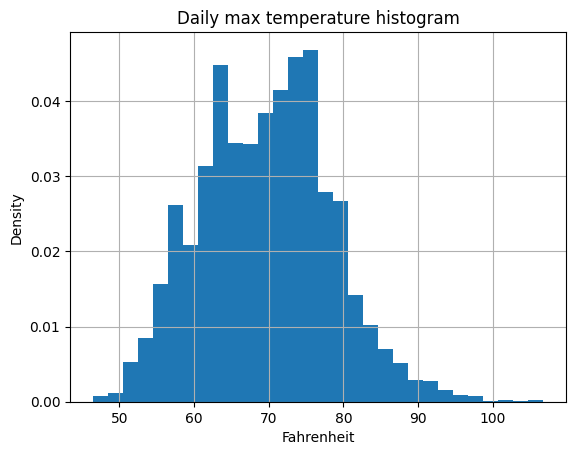

In [102]:
plt.hist(df_daily_max['temp_f'], bins=30, density=True)
plt.title('Daily max temperature histogram')
plt.xlabel('Fahrenheit')
plt.ylabel('Density')
plt.grid()
plt.show()

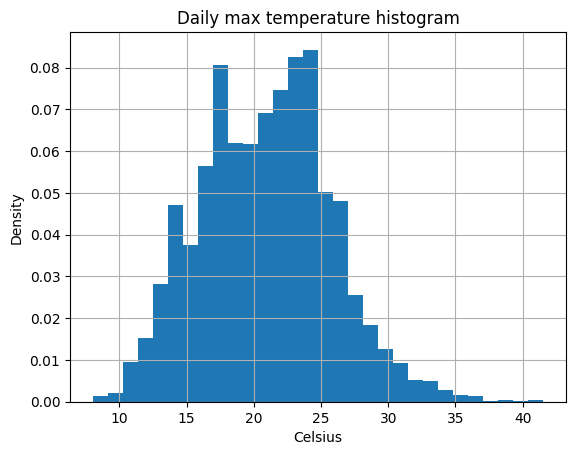

In [103]:
plt.hist(df_daily_max['temp_c'], bins=30, density=True)
plt.title('Daily max temperature histogram')
plt.xlabel('Celsius')
plt.ylabel('Density')
plt.grid()
plt.show()

In [104]:
prob_over_100 = sum(df_daily_max['temp_f'] > 100) / len(df_daily_max)
prob_over_90 = sum(df_daily_max['temp_f'] > 90) / len(df_daily_max)

print(f'Probability to hit max temperature above 100F: {prob_over_100:.1%}')
print(f'Number of days to hit the temperature per year: {365 * prob_over_100:.1f} days')
print()
print(f'Probability to hit max temperature above 90F: {prob_over_90:.1%}')
print(f'Number of days to hit the temperature per year: {365 * prob_over_90:.1f} days')

Probability to hit max temperature above 100F: 0.1%
Number of days to hit the temperature per year: 0.5 days

Probability to hit max temperature above 90F: 1.5%
Number of days to hit the temperature per year: 5.3 days


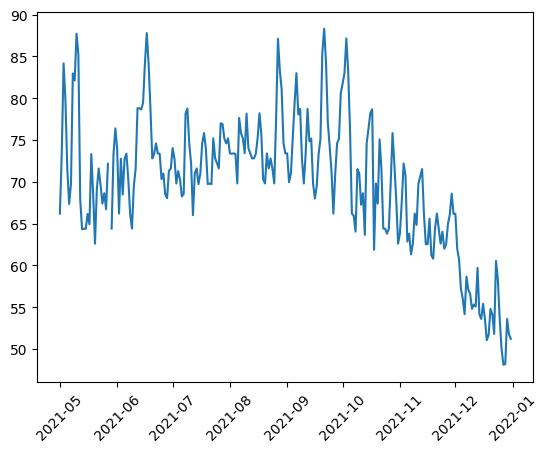

In [111]:
df_tmp = df_daily_max.loc[df_daily_max.index >= date(2021, 5, 1)]
plt.plot(df_tmp['temp_f'])
plt.xticks(rotation=45)
plt.show()